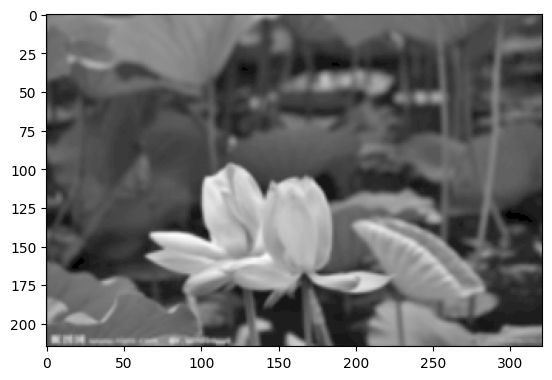

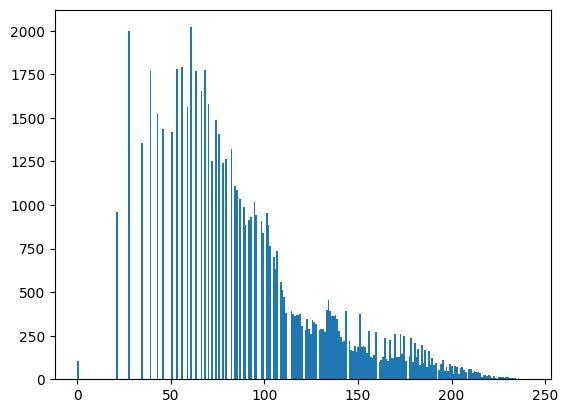

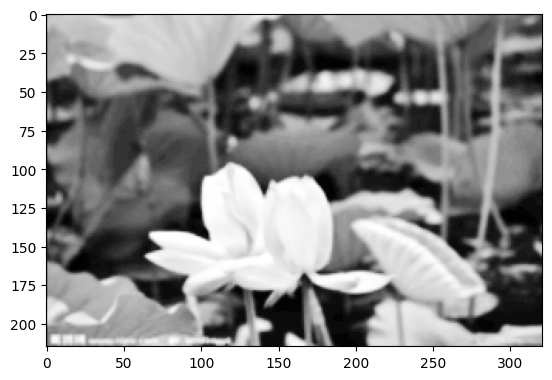

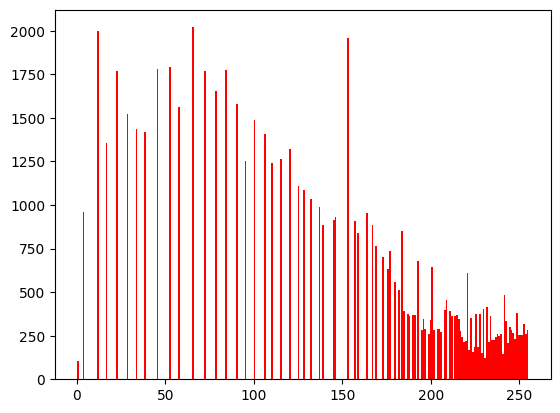

In [5]:
import numpy as np
import os
import cv2
import csv
import matplotlib.pyplot as plt
  
vis_stds = []
infrar_stds = []
 
def equalize_hist(im, nbr_bins=256):
    """对一幅灰度图像进行直方图均衡化"""
    # 图像直方图统计
    imhist, bins = np.histogram(im.flatten(), nbr_bins)
    # 累积分布函数
    cdf = imhist.cumsum()
    cdf = 255.0 * cdf / cdf[-1]
    # 使用累积分布函数的线性插值，计算新的像素值
    im2 = np.interp(im.flatten(), bins[:-1], cdf)  # 分段线性插值函数
    return im2.reshape(im.shape), cdf
 
rfn_path = 'image\h.png'
img_infrar = None
if os.path.exists(rfn_path):
    img_vis = cv2.imread(rfn_path, cv2.IMREAD_GRAYSCALE)
    # 显示原始图
    plt.imshow(img_vis, 'gray')
    plt.show()
 
    # 统计原始图直方图
    plt.hist(img_vis.flatten(), 256)
    plt.show()
 
    # 图像均衡化
    img_equalize_hist, cdf = equalize_hist(img_vis)
    #img_equalize_hist = img_vis
    # 显示均衡化图
    plt.imshow(img_equalize_hist/255.0, 'gray')
    plt.show()
    
    # 显示均衡化图的直方图
    plt.hist(img_equalize_hist.flatten(),256, color='r')
    plt.show()
 
    # 显示累积分布函数
    # plt.plot(cdf, color='r')
    # plt.show()